In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/FinalProject/merged_features.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Full Path,Domain,Attribution,Network Conditions,First Packet Sizes,Total Packets,Total Bytes,Bits per Peak,Mean Packet Size,Variance Packet Size,Skewness Packet Size,Mean Inter-arrival Time,Variance Inter-arrival Time,Skewness Inter-arrival Time,Bandwidth (bytes/sec),Packets per Second,Flow Duration (sec),Source IPs,Destination IPs,Protocols,TTL Values,Session Duration,Packet Count,Byte Count,HTTP Count,HTTPS Count,FTP Count,Avg Packet Inter-Arrival Time,Flow Size,TCP SYN Count,TCP ACK Count,MIME Types,URL Patterns,Burstiness,Protocol Diversity,Steady Traffic,Volume Intensity
0,Data\browsing\aboutads.info\drop --rate 10%\20...,aboutads,browsing,drop --rate 10%,"[217, 59, 54, 54, 54]",22904,17933918,11952,783.003755,360166.423424,-0.312564,0.001873,0.001036,36.403473,418158.261618,534.043750,42.887872,17,16,"TCP,ARP,SSDP,QUIC,MDNS,TLSv1,TLSv1.3,IGMPv3,DN...","246,123,122,239,56,59,,60,1,64,55,119,128,49,230",42.887872,22904,17933918,0,470,0,0.001873,22904,20,994,[],[],1,0.002128,1,418158.261618
1,Data\browsing\algemeiner.com\corrupt --rate 5%...,algemeiner,browsing,corrupt --rate 5%,"[529, 217, 66, 66, 54]",24088,9975626,12048,414.132597,290036.581745,1.155723,0.004657,0.002798,72.293751,88921.954786,214.718560,112.184061,256,262,"TCP,ARP,SSDP,QUIC,TLSv1.3,MDNS,SSLv2,HTTP/XML,...",",123,122,59,241,102,114,234,244,43,235,64,58,5...",112.184061,24088,9975626,4,7659,0,0.004657,24088,1219,18889,"['', 'text/html', 'text/xml; charset=""utf-8""']","['', 'http://10.100.102.1:49152/upnp/control/W...",1,0.000261,1,88921.954786
2,Data\browsing\algemeiner.com\delay --time 200m...,algemeiner,browsing,delay --time 200ms,"[217, 60, 217, 82, 82]",27440,14464434,12048,527.129519,338433.324162,0.654240,0.003355,0.000985,41.658135,157128.492565,298.083273,92.054813,246,246,"TCP,SSDP,QUIC,MDNS,SSLv2,ICMP,UDP,TLSv1,TLSv1....","123,122,59,241,234,43,244,235,64,58,55,51,115,...",92.054813,27440,14464434,2,7299,0,0.003355,27440,722,16703,[''],"['', 'http://cacerts.rapidssl.com/RapidSSLTLSR...",1,0.000274,1,157128.492565
3,Data\browsing\arstechnica.com\corrupt --rate 5...,arstechnica,browsing,corrupt --rate 5%,"[217, 69, 69, 75, 75]",18940,11636289,12048,614.376399,370196.055317,0.341795,0.004519,0.004767,62.281671,135959.054674,221.296024,85.586716,205,208,"TCP,ARP,SSDP,QUIC,TLSv1.3,MDNS,HTTP/XML,ICMP,U...",",123,122,59,241,234,244,43,235,64,58,55,247,50...",85.586716,18940,11636289,5,3377,0,0.004519,18940,521,8527,"['', 'application/octet-stream', 'text/xml; ch...","['', 'http://edgedl.me.gvt1.com/edgedl/release...",1,0.000591,1,135959.054674
4,Data\browsing\arstechnica.com\corrupt --rate 5...,arstechnica,browsing,corrupt --rate 5%,"[217, 69, 69, 75, 75]",18051,10093647,12048,559.173841,358315.277146,0.530226,0.004024,0.002123,37.338116,138970.354744,248.527997,72.631656,186,188,"TCP,ARP,SSDP,QUIC,TLSv1.3,MDNS,HTTP/XML,ICMP,U...",",123,122,59,241,234,244,43,221,235,64,58,55,24...",72.631656,18051,10093647,8,3470,0,0.004024,18051,756,9363,"['', 'application/octet-stream', 'text/xml; ch...","['', 'http://edgedl.me.gvt1.com/edgedl/release...",1,0.000575,1,138970.354744


In [4]:
pd.set_option('display.max_rows', None)

threshold = 100


domain_counts = df['Domain'].value_counts()
# print(domain_counts[domain_counts < threshold])
print(df['Domain'].value_counts())

unique_domain_count = df['Domain'].nunique()
print(f"Number of unique domains: {unique_domain_count}")


# attribution_counts = df['Attribution'].value_counts()
# print(attribution_counts[attribution_counts < threshold])


# network_conditions_counts = df['Network Conditions'].value_counts()
# print(network_conditions_counts[network_conditions_counts < threshold])

pd.reset_option('display.max_rows')

Domain
bbc                   263
govt                  243
cnn                   239
youtube               222
ufile                 183
file                  183
gofile                181
arstechnica           144
usda                   82
theguardian            41
israelhayom            41
nbcnews                31
techcrunch             27
jpost                  26
dailymotion            20
mako                   16
ca                     15
ndtv                   13
ynet                   12
sec                    12
googleadservices       12
wprdc                  12
google                 11
maariv                 10
amazonaws              10
census                  8
walla                   8
epa                     6
condenast               5
theatlantic             3
npr                     3
ed                      3
nature                  3
ynetnews                2
vulture                 2
vox                     2
zdnet                   2
algemeiner              2
propu

In [5]:
pd.set_option('display.max_rows', None)
# Count unique combinations of 'Domain' and 'Attribution'
domain_attribution_counts = df.groupby(['Domain', 'Attribution']).size()
print(domain_attribution_counts)
pd.reset_option('display.max_rows')

Domain              Attribution  
aboutads            browsing           1
algemeiner          browsing           2
amazonaws           file download     10
arcgis              file download      1
arstechnica         browsing         144
axios               browsing           2
bbc                 VOD              101
                    browsing         162
bloomberg           browsing           1
businessinsider     browsing           1
buzzfeednews        browsing           1
ca                  file download     15
census              file download      8
cloud               file download      2
cnbc                browsing           1
cnet                browsing           1
cnn                 VOD              114
                    browsing         125
condenast           browsing           5
dailymotion         VOD               20
data                file download      2
digitaltrends       browsing           1
dot                 file download      1
economist           bro

In [6]:
# domain_counts = df['Domain'].value_counts()
# valid_domains = domain_counts[domain_counts >= 10].index
# df = df[df['Domain'].isin(valid_domains)]

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing or string data
df['First Packet Sizes'] = df['First Packet Sizes'].apply(lambda x: np.mean(eval(x)) if x != '[]' else 0)  # Mean of packet sizes
df['Protocols'] = df['Protocols'].apply(lambda x: len(x.split(',')))  # Number of protocols used
df['TTL Values'] = df['TTL Values'].apply(lambda x: len(x.split(',')))  # Number of TTL values observed
df['MIME Types'] = df['MIME Types'].apply(lambda x: len(x))  # Number of MIME types
df['URL Patterns'] = df['URL Patterns'].apply(lambda x: len(x))  # Number of URL patterns

# Encode categorical data
le = LabelEncoder()
df['Domain'] = le.fit_transform(df['Domain'])
df['Attribution'] = le.fit_transform(df['Attribution'])
df['Network Conditions'] = le.fit_transform(df['Network Conditions'])


X = df.drop(columns=['Full Path', 'Domain', 'Attribution', 'Network Conditions'])
y_domain = df['Domain']  # Domain is the label


def evaluate_model(features):
    # Subset features based on importance
    X_subset = X[features]

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_domain, test_size=0.3, random_state=42)

    # Train Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Train
clf_all = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y_domain, test_size=0.3, random_state=42)
clf_all.fit(X_train, y_train)

# Feature importance from the model
importances = clf_all.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Different subsets of features
top_10_features = feature_importance_df['Feature'].head(10).tolist()
top_15_features = feature_importance_df['Feature'].head(15).tolist()
top_20_features = feature_importance_df['Feature'].head(20).tolist()


results = {}

# Test with all features
all_features = feature_importance_df['Feature'].tolist()
results['All Features'] = evaluate_model(all_features)

# Test with top 10 features
results['Top 10 Features'] = evaluate_model(top_10_features)

# Test with top 15 features
results['Top 15 Features'] = evaluate_model(top_15_features)

# Test with top 20 features
results['Top 20 Features'] = evaluate_model(top_20_features)

# Compare results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
print(results_df)

# # Visualize
# plt.figure(figsize=(10, 6))
# sns.barplot(data=results_df)
# plt.title('Comparison of Performance with Different Feature Sets')
# plt.ylabel('Scores')
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

                 Accuracy  Precision    Recall  F1 Score
All Features     0.866261   0.834950  0.866261  0.842560
Top 10 Features  0.858663   0.829649  0.858663  0.833797
Top 15 Features  0.851064   0.826582  0.851064  0.827658
Top 20 Features  0.863222   0.836130  0.863222  0.840168


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Classify using 20 top features**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

                              Accuracy  Precision    Recall  F1 Score
Logistic Regression           0.440729   0.402695  0.440729  0.378482
Support Vector Machine (SVM)  0.354103   0.236855  0.354103  0.247151
K-Nearest Neighbors (KNN)     0.586626   0.563389  0.586626  0.566362
Gradient Boosting             0.785714   0.793346  0.785714  0.778943
Naive Bayes                   0.451368   0.527074  0.451368  0.426026
Decision Tree                 0.810030   0.817798  0.810030  0.809299
Random Forest                 0.875380   0.845243  0.875380  0.853998
Multilayer Perceptron (MLP)   0.379939   0.289368  0.379939  0.305509


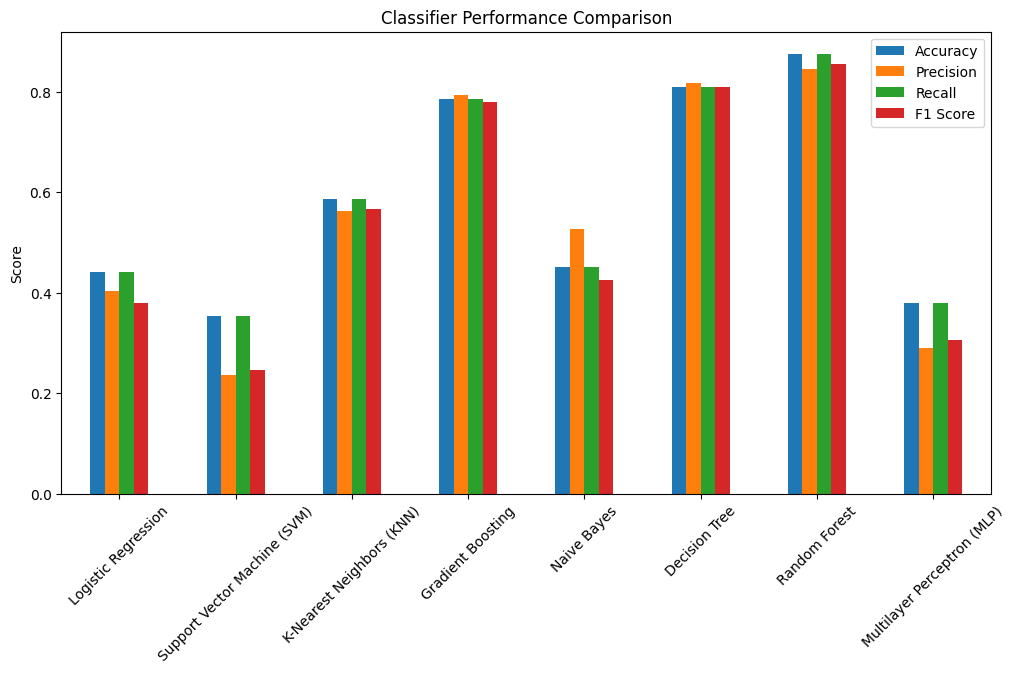

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.impute import SimpleImputer

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1


X = df[top_20_features]
y = df['Domain']

# imputer the missing values with mean
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_domain, test_size=0.3, random_state=42)

# Classifiers to test with
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine (SVM)': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Multilayer Perceptron (MLP)': MLPClassifier(max_iter=1000)
}

# A dictionary for the results
results = {}

# Iterate over classifiers and evaluate
for name, clf in classifiers.items():
    accuracy, precision, recall, f1 = evaluate_model(clf, X_train, X_test, y_train, y_test)
    results[name] = [accuracy, precision, recall, f1]

# Convert results to a DataFrame
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
print(results_df)

# Plot the performance comparison
results_df.plot(kind='bar', figsize=(12, 6), title="Classifier Performance Comparison", ylabel="Score")
plt.xticks(rotation=45)
plt.show()